In [23]:
import pandas as pd  # For data handling
import re  # For regular expressions
import nltk  # For text processing
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # For plotting

# Ensure all nltk resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Function to preprocess text data
def pre_processing(text):
    # Define stop words and lemmatizer within the function to ensure they are recognized
    stop_words = set(stopwords.words("turkish"))  # Load Turkish stop words
    lemma = nltk.WordNetLemmatizer()
    text = text.lower()
    text = re.sub("[^a-zçğışöü]", " ", text, flags=re.IGNORECASE)
    words = nltk.word_tokenize(text)
    words = [lemma.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

# Load data
df_train = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_train.csv', encoding= 'unicode_escape')
df_test = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_test.csv', encoding= 'unicode_escape')

In [25]:
# Apply pre-processing to the text data
df_train['clean_text'] = df_train['comment'].apply(pre_processing)
df_test['clean_text'] = df_test['comment'].apply(pre_processing)

In [26]:
# Setup data for training/testing
X_train = df_train['clean_text']
y_train = df_train['Label']
X_test = df_test['clean_text']
y_test = df_test['Label']

In [27]:
# Defining and training the neural network:

nn_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, activation='relu', solver='adam', random_state=42))
])
nn_model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', MLPClassifier(max_iter=300, random_state=42))])

Neural Network Test Accuracy: 0.8829707426856714
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      1333
           1       0.88      0.89      0.88      1333

    accuracy                           0.88      2666
   macro avg       0.88      0.88      0.88      2666
weighted avg       0.88      0.88      0.88      2666



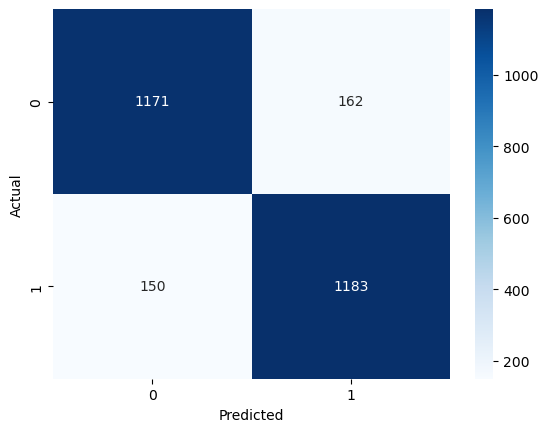

In [28]:
# Predictions and evaluation
y_pred_nn = nn_model.predict(X_test)
print('Neural Network Test Accuracy:', nn_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_nn))

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    conf_mat = confusion_matrix(y_true, y_pred)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_nn)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Predictions and evaluation using nn_model
y_pred = nn_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Train Accuracy : %.3f' % nn_model.score(X_train, y_train))
print('Test Accuracy : %.3f' % nn_model.score(X_test, y_test))
print("Precision Score: %.3f" % precision_score(y_test, y_pred, average='macro'))
print("Recall Score: %.3f" % recall_score(y_test, y_pred, average='macro'))
print("F1 Score: %.3f" % f1_score(y_test, y_pred, average='macro'))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88      1333
           1       0.88      0.89      0.88      1333

    accuracy                           0.88      2666
   macro avg       0.88      0.88      0.88      2666
weighted avg       0.88      0.88      0.88      2666

Train Accuracy : 0.999
Test Accuracy : 0.883
Precision Score: 0.883
Recall Score: 0.883
F1 Score: 0.883
